Enter your age: 18
Enter your email: ade@hjx.com
Valid email entered!

What category would you like to view 
a) Traditional Art 
b) Modern Art 
c) Contemporary Art 
d) Exit 

Enter your choice (a, b, c, or d to exit): a
You selected A. Displaying images...



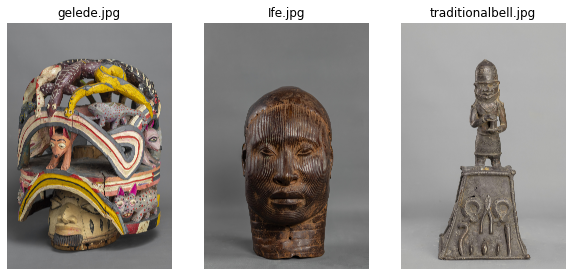

Select an image by entering its number (1, 2, 3, ...): 2
Selected image: Ife.jpg
What transformation do you want to perform on (Ife.jpg)?
a) Image translation
b) Reflection
c) Image rotation
d) Image cropping
e) Sheared image (X-axis)
f) Sheared image (Y-axis)
g) Image blurring
Enter your choice (a-g): b
Enter 1 for horizontal, 0 for vertical, -1 for both: 1


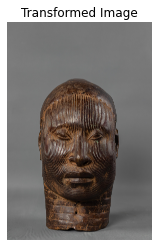


What category would you like to view 
a) Traditional Art 
b) Modern Art 
c) Contemporary Art 
d) Exit 

Enter your choice (a, b, c, or d to exit): d
Exiting program. Thank you!


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import re


def login():
    age = input("Enter your age: ").strip()
    if not age.isdigit():
        print("Invalid age! Age should be a number.")
        return False
    
    age = int(age)
    if age < 18:
        print("You are not eligible to view. Exiting program.")
        return False
    
    email = input("Enter your email: ").strip().lower()
    if re.match(r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$", email):
        print("Valid email entered!")
        return True
    else:
        print("Invalid email format. Please try again.")
        return


def display_images(folder_path):
    if not os.path.exists(folder_path):
        print("Folder not found!")
        return []

    image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png", ".jpeg"))]

    if not image_files:
        print("No images found in this category.")
        return []

    plt.figure(figsize=(10, 5))

    for i, file in enumerate(image_files, 1):
        img = cv2.imread(os.path.join(folder_path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

        plt.subplot(1, len(image_files), i)
        plt.imshow(img)
        plt.title(file)
        plt.axis("off")

    plt.show()
    return image_files


def transform_image(image_path, transformation):
    img = cv2.imread(image_path)

    if transformation == "a": 
        tx = int(input("Enter translation along x-axis: "))
        ty = int(input("Enter translation along y-axis: "))
        M = np.float32([[1, 0, tx], [0, 1, ty]])
        transformed = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    elif transformation == "b":  
        flip_code = int(input("Enter 1 for horizontal, 0 for vertical, -1 for both: "))
        transformed = cv2.flip(img, flip_code)

    elif transformation == "c": 
        angle = int(input("Enter rotation angle (degrees): "))
        center = (img.shape[1] // 2, img.shape[0] // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1)
        transformed = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    elif transformation == "d":  
        x1 = int(input("Enter x1 (starting x): "))
        y1 = int(input("Enter y1 (starting y): "))
        x2 = int(input("Enter x2 (ending x): "))
        y2 = int(input("Enter y2 (ending y): "))
        transformed = img[y1:y2, x1:x2]

    elif transformation == "e": 
        shear_factor = float(input("Enter shear factor for X-axis: "))
        M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
        transformed = cv2.warpAffine(img, M, (img.shape[1] + int(shear_factor * img.shape[0]), img.shape[0]))

    elif transformation == "f": 
        shear_factor = float(input("Enter shear factor for Y-axis: "))
        M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
        transformed = cv2.warpAffine(img, M, (img.shape[1], img.shape[0] + int(shear_factor * img.shape[1])))

    elif transformation == "g":
        ksize = int(input("Enter blur kernel size (odd number): "))
        if ksize % 2 == 0:
            ksize += 1 
        transformed = cv2.GaussianBlur(img, (ksize, ksize), 0)

    else:
        print("Invalid transformation choice!")
        return

    plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Transformed Image")
    plt.show()


def category():
    while True:
        category = input("\nWhat category would you like to view \na) Traditional Art \nb) Modern Art \nc) Contemporary Art \nd) Exit \n\nEnter your choice (a, b, c, or d to exit): ").strip().lower()

        if category == "d":
            print("Exiting program. Thank you!")
            break

        folder_map = {
            "a": "images/traditional",
            "b": "images/modern",
            "c": "images/contemporary"
        }

        if category in folder_map:
            print(f"You selected {category.upper()}. Displaying images...\n")
            images = display_images(folder_map[category]) 

            if images:
                art = input("Select an image by entering its number (1, 2, 3, ...): ").strip()
                if art.isdigit():
                    index = int(art) - 1
                    if 0 <= index < len(images):
                        image_path = os.path.join(folder_map[category], images[index])
                        print(f"Selected image: {images[index]}")

                        transform = input(
                            f"What transformation do you want to perform on ({images[index]})?\n"
                            "a) Image translation\nb) Reflection\nc) Image rotation\nd) Image cropping\n"
                            "e) Sheared image (X-axis)\nf) Sheared image (Y-axis)\ng) Image blurring\n"
                            "Enter your choice (a-g): ").strip().lower()

                        transform_image(image_path, transform)
                    else:
                        print("Invalid image selection!")
                else:
                    print("Please enter a valid number!")
        else:
            print("Invalid choice! Please enter 'a', 'b', 'c', or 'd'.")

if login():
    category()
